<a href="https://colab.research.google.com/github/aalvinsu/test_belajar/blob/main/h8dsft_P0GC1_Alvin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Perkenalan**



Dalam proyek analisis data COVID-19 dari John Hopkins University, fokus saya adalah pada empat aspek utama. Pertama, saya akan menganalisis jumlah kasus COVID-19 yang tercatat, menggunakan grafik dan visualisasi untuk memperlihatkan tren pertumbuhan kasus secara global dan per bulannya selama 2020. Selanjutnya, saya akan memperhatikan pemetaan geografis penyebaran COVID-19 di seluruh dunia, dengan menggunakan diagram bar untuk menunjukkan negara mana yang memiliki kasus terkonfirmasi Covid terbanyak di dunia, juga saya akan mengidentifikasi provinsi mana yang menjadi sebuah hotspot penyebaran Covid-19 di negara tersebut

## Impor Pustaka

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Loading

In [150]:
# Membaca file CSV
df = pd.read_csv('/content/h8dsft_P0GC1_Alvin.csv')

# Melihat head

df.head()

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
0,Florida,US,2020-05-15,26.901310,-81.929491,POINT(-81.92949121 26.90131002),367,40,0.0,327.0,12015.0,Charlotte,"Charlotte, Florida, US"
1,Nebraska,US,2020-05-15,42.545026,-101.124433,POINT(-101.1244332 42.54502621),1,0,0.0,1.0,31031.0,Cherry,"Cherry, Nebraska, US"
2,Tennessee,US,2020-05-15,35.425275,-88.609584,POINT(-88.6095842 35.42527478),12,0,0.0,12.0,47023.0,Chester,"Chester, Tennessee, US"
3,North Carolina,US,2020-05-15,36.129081,-76.601184,POINT(-76.60118385 36.12908077),12,0,0.0,12.0,37041.0,Chowan,"Chowan, North Carolina, US"
4,Nevada,US,2020-05-15,39.581057,-118.339461,POINT(-118.3394607 39.58105744),5,0,0.0,5.0,32001.0,Churchill,"Churchill, Nevada, US"


In [151]:
# Melihat Tail

df.tail()

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
60815,Illinois,US,2021-11-14,38.353092,-89.409827,POINT(-89.40982703 38.35309213),2171,29,NaN,NaN,17189.0,Washington,"Washington, Illinois, US"
60816,Indiana,US,2021-11-14,40.606269,-87.310940,POINT(-87.31093999 40.60626947),1558,17,NaN,NaN,18007.0,Benton,"Benton, Indiana, US"
60817,Indiana,US,2021-11-14,40.050930,-86.468416,POINT(-86.46841646 40.0509304),9298,119,NaN,NaN,18011.0,Boone,"Boone, Indiana, US"
60818,Indiana,US,2021-11-14,39.196056,-86.228689,POINT(-86.22868909 39.19605589),1607,49,NaN,NaN,18013.0,Brown,"Brown, Indiana, US"
60819,Indiana,US,2021-11-14,39.395618,-87.117235,POINT(-87.11723506 39.39561833),4409,60,NaN,NaN,18021.0,Clay,"Clay, Indiana, US"


In [152]:
# Displaying Data Type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60820 entries, 0 to 60819
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   province_state  58015 non-null  object 
 1   country_region  60820 non-null  object 
 2   date            60820 non-null  object 
 3   latitude        59418 non-null  float64
 4   longitude       59418 non-null  float64
 5   location_geom   59418 non-null  object 
 6   confirmed       60820 non-null  int64  
 7   deaths          60820 non-null  int64  
 8   recovered       18589 non-null  float64
 9   active          18425 non-null  float64
 10  fips            49644 non-null  float64
 11  admin2          49727 non-null  object 
 12  combined_key    60667 non-null  object 
dtypes: float64(5), int64(2), object(6)
memory usage: 6.0+ MB


## Data Cleansing

In [153]:
# Mengubah nama DF menjadi Data Covid
data_covid = df.copy()

In [154]:
data_covid.shape

(60820, 13)

In [155]:
# Menghapus baris yang tidak memiliki data

rows_without_missing_data = data_covid.dropna()

In [156]:
data_covid

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
0,Florida,US,2020-05-15,26.901310,-81.929491,POINT(-81.92949121 26.90131002),367,40,0.0,327.0,12015.0,Charlotte,"Charlotte, Florida, US"
1,Nebraska,US,2020-05-15,42.545026,-101.124433,POINT(-101.1244332 42.54502621),1,0,0.0,1.0,31031.0,Cherry,"Cherry, Nebraska, US"
2,Tennessee,US,2020-05-15,35.425275,-88.609584,POINT(-88.6095842 35.42527478),12,0,0.0,12.0,47023.0,Chester,"Chester, Tennessee, US"
3,North Carolina,US,2020-05-15,36.129081,-76.601184,POINT(-76.60118385 36.12908077),12,0,0.0,12.0,37041.0,Chowan,"Chowan, North Carolina, US"
4,Nevada,US,2020-05-15,39.581057,-118.339461,POINT(-118.3394607 39.58105744),5,0,0.0,5.0,32001.0,Churchill,"Churchill, Nevada, US"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60815,Illinois,US,2021-11-14,38.353092,-89.409827,POINT(-89.40982703 38.35309213),2171,29,NaN,NaN,17189.0,Washington,"Washington, Illinois, US"
60816,Indiana,US,2021-11-14,40.606269,-87.310940,POINT(-87.31093999 40.60626947),1558,17,NaN,NaN,18007.0,Benton,"Benton, Indiana, US"
60817,Indiana,US,2021-11-14,40.050930,-86.468416,POINT(-86.46841646 40.0509304),9298,119,NaN,NaN,18011.0,Boone,"Boone, Indiana, US"
60818,Indiana,US,2021-11-14,39.196056,-86.228689,POINT(-86.22868909 39.19605589),1607,49,NaN,NaN,18013.0,Brown,"Brown, Indiana, US"


## Eksplorasi Data

In [157]:
# Konversi kolom "date" ke dalam tipe data datetime
data_covid["date"] = pd.to_datetime(data_covid["date"])

In [158]:
# Filter data hanya untuk tahun 2020
data_covid_2020 = data_covid[data_covid["date"].dt.year == 2020]

In [159]:
# Membuat kolom baru "month" berdasarkan bulan dari kolom "date"
data_covid_2020["month"] = data_covid_2020["date"].dt.month_name()

<ipython-input-159-d12ef4441f26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_covid_2020["month"] = data_covid_2020["date"].dt.month_name()


In [160]:
# Mengelompokkan data berdasarkan bulan dan menjumlahkan jumlah kematian
deaths_by_month = data_covid_2020.groupby("month")["deaths"].sum()

<Axes: xlabel='month'>

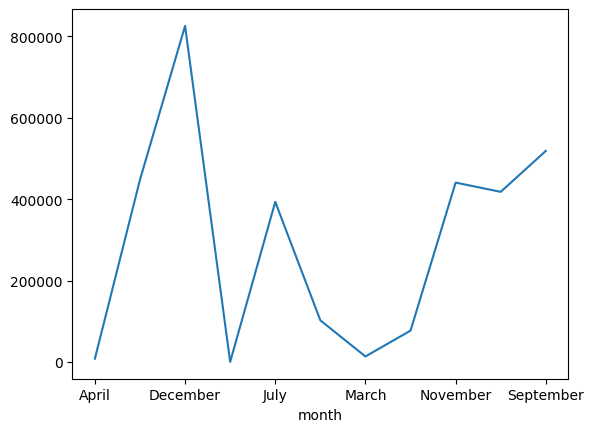

In [161]:
# Plot grafik jumlah kematian COVID-19 berdasarkan bulan
deaths_by_month.plot()

In [162]:
# Mengelompokkan data berdasarkan negara dan menjumlahkan jumlah terkonfirmasi
terkonfirmasi_per_negara = data_covid.groupby("country_region")["confirmed"].sum()

In [163]:
# Mengurutkan data secara menurun berdasarkan jumlah terkonfirmasi
terkonfirmasi_per_negara = terkonfirmasi_per_negara.sort_values(ascending=False)

In [164]:
# Mengambil 10 negara dengan jumlah terkonfirmasi tertinggi
top_10_negara = terkonfirmasi_per_negara.head(10)

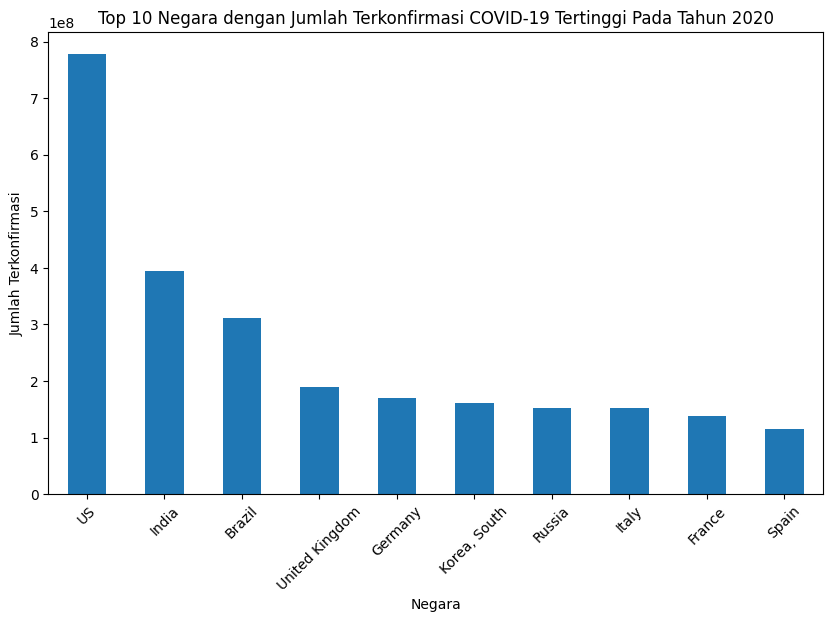

In [165]:
# Membuat plot batang untuk menampilkan data
plt.figure(figsize=(10, 6))
top_10_negara.plot(kind="bar")
plt.xlabel("Negara")
plt.ylabel("Jumlah Terkonfirmasi")
plt.title("Top 10 Negara dengan Jumlah Terkonfirmasi COVID-19 Tertinggi Pada Tahun 2020")
plt.xticks(rotation=45)
plt.show()

In [166]:
# Filter data untuk negara-negara dengan jumlah kematian di atas 100 orang
negara_terparah = data_covid[data_covid["deaths"] > 100]

In [167]:
# Mengelompokkan data berdasarkan negara dan menjumlahkan jumlah kematian
kematian_per_negara = negara_terparah.groupby("country_region")["deaths"].sum()


In [168]:
# Mengurutkan data secara menurun berdasarkan jumlah kematian
kematian_per_negara = kematian_per_negara.sort_values(ascending=False)

In [169]:
# Mengambil negara dengan jumlah kematian tertinggi
negara_tertinggi = kematian_per_negara.head(1).index[0]

In [170]:
print("Negara terparah dengan kriteria kematian di atas 100 orang:", negara_tertinggi)

Negara terparah dengan kriteria kematian di atas 100 orang: US


In [171]:
# Filter data untuk provinsi di AS dengan jumlah kematian di atas 1000 orang
provinsi_terparah_us = data_covid[(data_covid["country_region"] == "US") & (data_covid["deaths"] > 1000)]

In [172]:
# Mengambil provinsi-provinsi yang memenuhi kriteria
provinsi_hotspot = provinsi_terparah_us["province_state"].unique()

In [173]:
print("Provinsi di AS dengan kematian di atas 1000 orang:")
print(provinsi_hotspot)

Provinsi di AS dengan kematian di atas 1000 orang:
['Illinois' 'California' 'Pennsylvania' 'Florida' 'Louisiana' 'New York'
 'Oklahoma' 'South Carolina' 'Texas' 'Arizona' 'Michigan' 'Missouri'
 'New Jersey' 'Ohio' 'Virginia' 'Washington' 'Wisconsin' 'Colorado'
 'Connecticut' 'Delaware' 'Georgia' 'Kansas' 'Massachusetts' 'Oregon'
 'Rhode Island' 'Maryland' 'North Carolina' 'Alabama' 'Minnesota'
 'Indiana' 'Kentucky' 'Nebraska' 'Nevada' 'Puerto Rico' 'New Mexico'
 'Tennessee' 'Arkansas' 'District of Columbia' 'Iowa' 'Idaho' 'Utah'
 'Hawaii']


In [174]:
# Menghitung jumlah kematian per provinsi
kematian_per_provinsi = provinsi_terparah_us.groupby("province_state")["deaths"].sum()

In [175]:
# Mengambil 5 provinsi teratas
top_5_provinsi = kematian_per_provinsi.head(5)

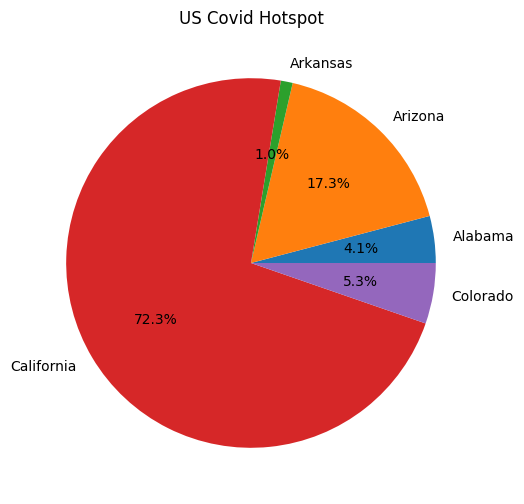

In [176]:
# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(top_5_provinsi, labels=top_5_provinsi.index, autopct='%1.1f%%')
plt.title("US Covid Hotspot")
plt.show()

# Kesimpulan

Kesimpulannya adalah pada tahun 2020 angka kematian tertinggi terjadi antara bulan April hingga bulan December, dimana pada tahun 2020 ini negara yang memiliki jumlah angka terkonfirmasi covid terbanyak adalah US, India, dan Brazil.

US sendiri memiliki top 5 provinsi angka terkonfirmasi covid terbanyak yaitu California, Arizona Colorado, Abama, dan Arkansas. Provinsi ini menjadi salah satu hotspot penyebaran Covid di Amerika.